In [ ]:
# WeatherPy
---
'''
Observable Trends:
1.
2.
3.
'''

In [88]:
# Dependencies
import csv
import json
import requests
import random
import pandas as pd
import matplotlib.pyplot as plt
import time
from citipy import citipy

In [89]:
## Data Retrieval

In [ ]:
sample = 500
x = 1

while x < sample:
    city = citipy.nearest_city(

In [90]:
# Read our data files with the pandas library
world_cities = "worldcities.csv"
cities_df = pd.read_csv(world_cities)

# Preview the data
cities_df.head()

,Country,City,Latitude,Longitude
0,ad,andorra la vella,42.500000,1.516667
1,ad,canillo,42.566667,1.600000
2,ad,encamp,42.533333,1.583333
3,ad,la massana,42.550000,1.516667
4,ad,les escaldes,42.500000,1.533333


In [91]:
# Randomly select 500 unique cities
sample_cities_df = cities_df.sample(n=500)

# Visualize head() of df
sample_cities_df.head() 

,Country,City,Latitude,Longitude
24295,mx,perote,19.566667,-97.233333
34560,ro,turt,47.983333,23.216667
44642,us,weehawken,40.769444,-74.020833
17897,in,hukeri,16.233333,74.600000
734,at,steyregg,48.283333,14.366667


In [92]:
# Add blank columns for Temp, Humidity, Cloudiness, and Wind Speed
# Note that we used "" to specify initial entry.
sample_cities_df["Temp (F)"] = ""
sample_cities_df["Humidity (%)"] = ""
sample_cities_df["Cloudiness (%)"] = ""
sample_cities_df["Wind Speed (mph)"] = ""

# Visualize head() of df
sample_cities_df.head()

,Country,City,Latitude,Longitude,Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
24295,mx,perote,19.566667,-97.233333,,,,
34560,ro,turt,47.983333,23.216667,,,,
44642,us,weehawken,40.769444,-74.020833,,,,
17897,in,hukeri,16.233333,74.600000,,,,
734,at,steyregg,48.283333,14.366667,,,,


In [93]:
# Counter
row_count = 1

# Loop through and grab the Temp, Humidity, Cloudiness and Wind Speed using OpenWeatherMapAPI
for index, row in sample_cities_df.iterrows():
    
    # My OpenWeatherMapAPI key
    api_key = "b058195e4179dda90e7316cc7ec35d34"

    # Create endpoint URL
    target_url = "https://api.openweathermap.org/data/2.5/weather" \
    "?lat=%s&lon=%s&units=IMPERIAL&mode=json&APPID=%s" % (row["Latitude"], row["Longitude"], api_key)
    
    # Print log to ensure loop is working correctly
    print(f"Now retrieving city #{row_count} | " + row["City"])
    print(target_url)
    row_count += 1
    
    # Run requests to grab the JSON at the requested URL
    json_url = requests.get(target_url).json()
    
    # Append the Temp, Humidity, Cloudiness and Wind Speed to the appropriate columns
    # Use try / except to skip any cities with errors
    try: 
        temp = json_url["main"]["temp"]
        humidity = json_url["main"]["humidity"]
        cloud = json_url["clouds"]["all"]
        wind = json_url["wind"]["speed"]
        
        sample_cities_df.set_value(index, "Temp (F)", temp)
        sample_cities_df.set_value(index, "Humidity (%)", humidity)
        sample_cities_df.set_value(index, "Cloudiness (%)", cloud)
        sample_cities_df.set_value(index, "Wind Speed (mph)", wind)
        
    except:
        print("Error with city data. Skipping")
        continue
    
    # Wait 15 seconds before doing anything else
    time.sleep(random.randint(1, 15))
    
print(
"------------------------------\n"
"Data Retrieval Complete\n"
"------------------------------\n"
)
        
# Visualize
sample_cities_df.head()

Now retrieving city #1 | perote
https://api.openweathermap.org/data/2.5/weather?lat=19.566667000000002&lon=-97.233333&units=IMPERIAL&mode=json&APPID=b058195e4179dda90e7316cc7ec35d34
Now retrieving city #2 | turt
https://api.openweathermap.org/data/2.5/weather?lat=47.983333&lon=23.216667&units=IMPERIAL&mode=json&APPID=b058195e4179dda90e7316cc7ec35d34
Now retrieving city #3 | weehawken
https://api.openweathermap.org/data/2.5/weather?lat=40.7694444&lon=-74.02083329999999&units=IMPERIAL&mode=json&APPID=b058195e4179dda90e7316cc7ec35d34
Now retrieving city #4 | hukeri
https://api.openweathermap.org/data/2.5/weather?lat=16.233333&lon=74.6&units=IMPERIAL&mode=json&APPID=b058195e4179dda90e7316cc7ec35d34
Now retrieving city #5 | steyregg
https://api.openweathermap.org/data/2.5/weather?lat=48.283333&lon=14.366667000000001&units=IMPERIAL&mode=json&APPID=b058195e4179dda90e7316cc7ec35d34
Now retrieving city #6 | smyshlyayevka
https://api.openweathermap.org/data/2.5/weather?lat=53.239127&lon=50.39072

Now retrieving city #47 | plavsk
https://api.openweathermap.org/data/2.5/weather?lat=53.709444&lon=37.291944&units=IMPERIAL&mode=json&APPID=b058195e4179dda90e7316cc7ec35d34
Now retrieving city #48 | panique
https://api.openweathermap.org/data/2.5/weather?lat=12.4532&lon=123.3821&units=IMPERIAL&mode=json&APPID=b058195e4179dda90e7316cc7ec35d34
Now retrieving city #49 | iwakura
https://api.openweathermap.org/data/2.5/weather?lat=35.283333&lon=136.866667&units=IMPERIAL&mode=json&APPID=b058195e4179dda90e7316cc7ec35d34
Now retrieving city #50 | vila cha
https://api.openweathermap.org/data/2.5/weather?lat=40.866667&lon=-8.466667&units=IMPERIAL&mode=json&APPID=b058195e4179dda90e7316cc7ec35d34
Now retrieving city #51 | kazar
https://api.openweathermap.org/data/2.5/weather?lat=48.049524&lon=19.861432&units=IMPERIAL&mode=json&APPID=b058195e4179dda90e7316cc7ec35d34
Now retrieving city #52 | san jose del golfo
https://api.openweathermap.org/data/2.5/weather?lat=14.762777999999999&lon=-90.376389&uni

Now retrieving city #94 | zacapa
https://api.openweathermap.org/data/2.5/weather?lat=14.966667000000001&lon=-89.533333&units=IMPERIAL&mode=json&APPID=b058195e4179dda90e7316cc7ec35d34
Now retrieving city #95 | kotri
https://api.openweathermap.org/data/2.5/weather?lat=25.366004&lon=68.312155&units=IMPERIAL&mode=json&APPID=b058195e4179dda90e7316cc7ec35d34
Now retrieving city #96 | pemba
https://api.openweathermap.org/data/2.5/weather?lat=-12.960833300000001&lon=40.5077778&units=IMPERIAL&mode=json&APPID=b058195e4179dda90e7316cc7ec35d34
Now retrieving city #97 | valcele
https://api.openweathermap.org/data/2.5/weather?lat=45.85&lon=25.683332999999998&units=IMPERIAL&mode=json&APPID=b058195e4179dda90e7316cc7ec35d34
Now retrieving city #98 | takatsuki
https://api.openweathermap.org/data/2.5/weather?lat=34.85&lon=135.616667&units=IMPERIAL&mode=json&APPID=b058195e4179dda90e7316cc7ec35d34
Now retrieving city #99 | san jeronimo de tunan
https://api.openweathermap.org/data/2.5/weather?lat=-11.95&lon

Now retrieving city #140 | mircea voda
https://api.openweathermap.org/data/2.5/weather?lat=45.116667&lon=27.383333&units=IMPERIAL&mode=json&APPID=b058195e4179dda90e7316cc7ec35d34
Now retrieving city #141 | pirsagi
https://api.openweathermap.org/data/2.5/weather?lat=40.564032&lon=49.8913&units=IMPERIAL&mode=json&APPID=b058195e4179dda90e7316cc7ec35d34
Now retrieving city #142 | kawardha
https://api.openweathermap.org/data/2.5/weather?lat=22.016667&lon=81.25&units=IMPERIAL&mode=json&APPID=b058195e4179dda90e7316cc7ec35d34
Now retrieving city #143 | bekovo
https://api.openweathermap.org/data/2.5/weather?lat=52.466322999999996&lon=43.711993&units=IMPERIAL&mode=json&APPID=b058195e4179dda90e7316cc7ec35d34
Now retrieving city #144 | chau doc
https://api.openweathermap.org/data/2.5/weather?lat=10.7&lon=105.11666699999999&units=IMPERIAL&mode=json&APPID=b058195e4179dda90e7316cc7ec35d34
Now retrieving city #145 | abilay
https://api.openweathermap.org/data/2.5/weather?lat=10.733333&lon=122.5&units=I

Now retrieving city #186 | branesti
https://api.openweathermap.org/data/2.5/weather?lat=45.033333&lon=25.416667&units=IMPERIAL&mode=json&APPID=b058195e4179dda90e7316cc7ec35d34
Now retrieving city #187 | straubing
https://api.openweathermap.org/data/2.5/weather?lat=48.883333&lon=12.566667&units=IMPERIAL&mode=json&APPID=b058195e4179dda90e7316cc7ec35d34
Now retrieving city #188 | novomykolayivka
https://api.openweathermap.org/data/2.5/weather?lat=48.556246&lon=34.373991&units=IMPERIAL&mode=json&APPID=b058195e4179dda90e7316cc7ec35d34
Now retrieving city #189 | rajmahal
https://api.openweathermap.org/data/2.5/weather?lat=25.05&lon=87.833333&units=IMPERIAL&mode=json&APPID=b058195e4179dda90e7316cc7ec35d34
Now retrieving city #190 | puerto vallarta
https://api.openweathermap.org/data/2.5/weather?lat=20.616667&lon=-105.25&units=IMPERIAL&mode=json&APPID=b058195e4179dda90e7316cc7ec35d34
Now retrieving city #191 | san ramon
https://api.openweathermap.org/data/2.5/weather?lat=37.78&lon=-121.9769444

Now retrieving city #232 | saint-etienne
https://api.openweathermap.org/data/2.5/weather?lat=45.435382000000004&lon=4.391051&units=IMPERIAL&mode=json&APPID=b058195e4179dda90e7316cc7ec35d34
Now retrieving city #233 | santa rosa
https://api.openweathermap.org/data/2.5/weather?lat=-26.866667&lon=-56.85&units=IMPERIAL&mode=json&APPID=b058195e4179dda90e7316cc7ec35d34
Now retrieving city #234 | busia
https://api.openweathermap.org/data/2.5/weather?lat=0.4544444&lon=34.0758333&units=IMPERIAL&mode=json&APPID=b058195e4179dda90e7316cc7ec35d34
Now retrieving city #235 | moroni
https://api.openweathermap.org/data/2.5/weather?lat=-11.704166699999998&lon=43.2402778&units=IMPERIAL&mode=json&APPID=b058195e4179dda90e7316cc7ec35d34
Now retrieving city #236 | chico
https://api.openweathermap.org/data/2.5/weather?lat=39.7286111&lon=-121.8363889&units=IMPERIAL&mode=json&APPID=b058195e4179dda90e7316cc7ec35d34
Now retrieving city #237 | barsuki
https://api.openweathermap.org/data/2.5/weather?lat=54.265476&lo

Now retrieving city #279 | kaspi
https://api.openweathermap.org/data/2.5/weather?lat=41.9161111&lon=44.4241667&units=IMPERIAL&mode=json&APPID=b058195e4179dda90e7316cc7ec35d34
Now retrieving city #280 | ramat hasharon
https://api.openweathermap.org/data/2.5/weather?lat=32.147222&lon=34.841667&units=IMPERIAL&mode=json&APPID=b058195e4179dda90e7316cc7ec35d34
Now retrieving city #281 | spring
https://api.openweathermap.org/data/2.5/weather?lat=30.079722200000003&lon=-95.4169444&units=IMPERIAL&mode=json&APPID=b058195e4179dda90e7316cc7ec35d34
Now retrieving city #282 | malling
https://api.openweathermap.org/data/2.5/weather?lat=56.036322999999996&lon=10.19632&units=IMPERIAL&mode=json&APPID=b058195e4179dda90e7316cc7ec35d34
Now retrieving city #283 | huasahuasi
https://api.openweathermap.org/data/2.5/weather?lat=-11.265&lon=-75.6508333&units=IMPERIAL&mode=json&APPID=b058195e4179dda90e7316cc7ec35d34
Now retrieving city #284 | rybinsk
https://api.openweathermap.org/data/2.5/weather?lat=58.044598&

Now retrieving city #325 | san patricio
https://api.openweathermap.org/data/2.5/weather?lat=15.0953&lon=120.7295&units=IMPERIAL&mode=json&APPID=b058195e4179dda90e7316cc7ec35d34
Now retrieving city #326 | barhiya
https://api.openweathermap.org/data/2.5/weather?lat=25.283333&lon=86.033333&units=IMPERIAL&mode=json&APPID=b058195e4179dda90e7316cc7ec35d34
Now retrieving city #327 | mutare
https://api.openweathermap.org/data/2.5/weather?lat=-18.966666699999998&lon=32.6666667&units=IMPERIAL&mode=json&APPID=b058195e4179dda90e7316cc7ec35d34
Now retrieving city #328 | tubbergen
https://api.openweathermap.org/data/2.5/weather?lat=52.405786&lon=6.7863679999999995&units=IMPERIAL&mode=json&APPID=b058195e4179dda90e7316cc7ec35d34
Now retrieving city #329 | heiligenhafen
https://api.openweathermap.org/data/2.5/weather?lat=54.36666700000001&lon=10.983333&units=IMPERIAL&mode=json&APPID=b058195e4179dda90e7316cc7ec35d34
Now retrieving city #330 | langres
https://api.openweathermap.org/data/2.5/weather?lat=4

Now retrieving city #371 | castlewood
https://api.openweathermap.org/data/2.5/weather?lat=39.5847222&lon=-104.90055559999999&units=IMPERIAL&mode=json&APPID=b058195e4179dda90e7316cc7ec35d34
Now retrieving city #372 | starotimoshkino
https://api.openweathermap.org/data/2.5/weather?lat=53.719076&lon=47.531156&units=IMPERIAL&mode=json&APPID=b058195e4179dda90e7316cc7ec35d34
Now retrieving city #373 | prievidza
https://api.openweathermap.org/data/2.5/weather?lat=48.7666667&lon=18.6333333&units=IMPERIAL&mode=json&APPID=b058195e4179dda90e7316cc7ec35d34
Now retrieving city #374 | kuty
https://api.openweathermap.org/data/2.5/weather?lat=48.258677&lon=25.179463000000002&units=IMPERIAL&mode=json&APPID=b058195e4179dda90e7316cc7ec35d34
Now retrieving city #375 | san agustin
https://api.openweathermap.org/data/2.5/weather?lat=13.2&lon=-87.1166667&units=IMPERIAL&mode=json&APPID=b058195e4179dda90e7316cc7ec35d34
Now retrieving city #376 | tayabo
https://api.openweathermap.org/data/2.5/weather?lat=15.834

Now retrieving city #417 | anchovy
https://api.openweathermap.org/data/2.5/weather?lat=18.4&lon=-77.9333333&units=IMPERIAL&mode=json&APPID=b058195e4179dda90e7316cc7ec35d34
Now retrieving city #418 | santa clara
https://api.openweathermap.org/data/2.5/weather?lat=24.483333&lon=-103.366667&units=IMPERIAL&mode=json&APPID=b058195e4179dda90e7316cc7ec35d34
Now retrieving city #419 | nea ionia
https://api.openweathermap.org/data/2.5/weather?lat=38.033333299999995&lon=23.75&units=IMPERIAL&mode=json&APPID=b058195e4179dda90e7316cc7ec35d34
Now retrieving city #420 | belen de umbria
https://api.openweathermap.org/data/2.5/weather?lat=5.200875&lon=-75.868652&units=IMPERIAL&mode=json&APPID=b058195e4179dda90e7316cc7ec35d34
Now retrieving city #421 | santo tirso
https://api.openweathermap.org/data/2.5/weather?lat=41.342566999999995&lon=-8.477456&units=IMPERIAL&mode=json&APPID=b058195e4179dda90e7316cc7ec35d34
Now retrieving city #422 | ayios petros
https://api.openweathermap.org/data/2.5/weather?lat=40

Now retrieving city #463 | melenki
https://api.openweathermap.org/data/2.5/weather?lat=55.3343&lon=41.6295&units=IMPERIAL&mode=json&APPID=b058195e4179dda90e7316cc7ec35d34
Now retrieving city #464 | adil-yangiyurt
https://api.openweathermap.org/data/2.5/weather?lat=43.563282&lon=46.584624&units=IMPERIAL&mode=json&APPID=b058195e4179dda90e7316cc7ec35d34
Now retrieving city #465 | dhanaura
https://api.openweathermap.org/data/2.5/weather?lat=28.966666999999998&lon=78.25&units=IMPERIAL&mode=json&APPID=b058195e4179dda90e7316cc7ec35d34
Now retrieving city #466 | hopatcong
https://api.openweathermap.org/data/2.5/weather?lat=40.9327778&lon=-74.6597222&units=IMPERIAL&mode=json&APPID=b058195e4179dda90e7316cc7ec35d34
Now retrieving city #467 | luanda
https://api.openweathermap.org/data/2.5/weather?lat=-8.836803999999999&lon=13.233173999999998&units=IMPERIAL&mode=json&APPID=b058195e4179dda90e7316cc7ec35d34
Now retrieving city #468 | lagoa vermelha
https://api.openweathermap.org/data/2.5/weather?lat=

,Country,City,Latitude,Longitude,Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
24295,mx,perote,19.566667,-97.233333,66.32,87,92,2.37
34560,ro,turt,47.983333,23.216667,55.4,93,48,4.7
44642,us,weehawken,40.769444,-74.020833,83.28,66,1,3.36
17897,in,hukeri,16.233333,74.600000,68.21,97,64,8.3
734,at,steyregg,48.283333,14.366667,55.4,82,8,3.36


In [94]:
## Save csv

In [95]:
# Save the DataFrame as a csv
# sample_cities_df.to_csv("Output/weatherpy_data.csv", encoding="utf-8", index=False)

In [96]:
## Plot Graphs

In [97]:
### Latitude vs. Temperature Plot

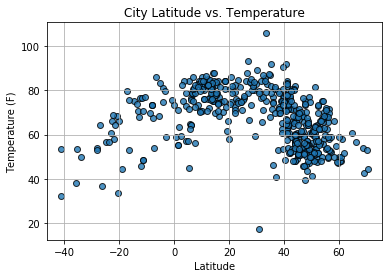

In [98]:
# Build a scatter plot City Latitude vs. Temperature
plt.scatter(sample_cities_df["Latitude"], 
            sample_cities_df["Temp (F)"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([min(sample_cities_df["Latitude"]-5), max(sample_cities_df["Latitude"]+5)])
plt.ylim([min(sample_cities_df["Temp (F)"]-5), max(sample_cities_df["Temp (F)"]+5)])

# Save the figure
plt.savefig("Output/lat_v_temp.png")

# Show plot
plt.show()

In [99]:
### Latitude vs. Humidity Plot

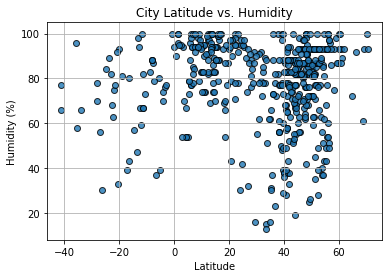

In [100]:
# Build a scatter plot City Latitude vs. Humidity
plt.scatter(sample_cities_df["Latitude"], 
            sample_cities_df["Humidity (%)"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([min(sample_cities_df["Latitude"]-5), max(sample_cities_df["Latitude"]+5)])
plt.ylim([min(sample_cities_df["Humidity (%)"]-5), max(sample_cities_df["Humidity (%)"]+5)])

# Save the figure
plt.savefig("Output/lat_v_humidity.png")

# Show plot
plt.show()

In [101]:
### Latitude vs. Cloudiness Plot

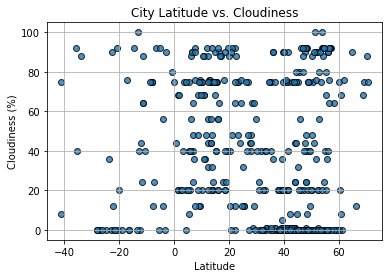

In [102]:
# Build a scatter plot City Latitude vs. Cloudiness
plt.scatter(sample_cities_df["Latitude"], 
            sample_cities_df["Cloudiness (%)"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([min(sample_cities_df["Latitude"]-5), max(sample_cities_df["Latitude"]+5)])
plt.ylim([min(sample_cities_df["Cloudiness (%)"]-5), max(sample_cities_df["Cloudiness (%)"]+5)])

# Save the figure
plt.savefig("Output/lat_v_cloud.png")

# Show plot
plt.show()

In [103]:
### Latitude vs. Wind Speed Plot

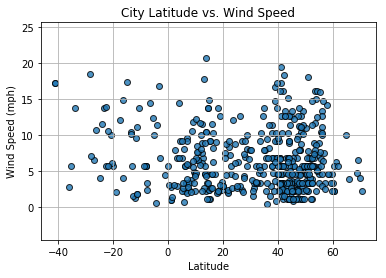

In [104]:
# Build a scatter plot City Latitude vs. Wind Speed
plt.scatter(sample_cities_df["Latitude"], 
            sample_cities_df["Wind Speed (mph)"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([min(sample_cities_df["Latitude"]-5), max(sample_cities_df["Latitude"]+5)])
plt.ylim([min(sample_cities_df["Wind Speed (mph)"]-5), max(sample_cities_df["Wind Speed (mph)"]+5)])

# Save the figure
plt.savefig("Output/lat_v_wind.png")

# Show plot
plt.show()